<h1> Student grade prediction </h1>
<h4> based on data from UCI ML repository </h4>

<p> Link to the Repo: <a href="https://archive.ics.uci.edu/ml/datasets/student+performance)">UCI ML Repository</a> </p> 

<h3> Start </h3>

<p> Libraries used </p>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
from matplotlib import style
from datetime import datetime

<p> To  measure the time of calculations </p>

In [ ]:
start_time = datetime.now()

<h3> Preparing the data </h3>

<p> Preparing data from the .csv file, and selecting the data usefull for the grade prediction </p>

In [ ]:
data = pd.read_csv("student-por.csv", sep=";")

data = data [["G1","G2","G3","freetime", "failures", "absences"]]

<p> Selecting a parameter to predict, AND! splitting data into to sections: train and test , test size for now is set to 0.2, as following the general rule of thumb to use 80/20 train/test spilt</p>

In [ ]:
# predicting G3 as the grade on those students finals
predict = "G3"

x = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

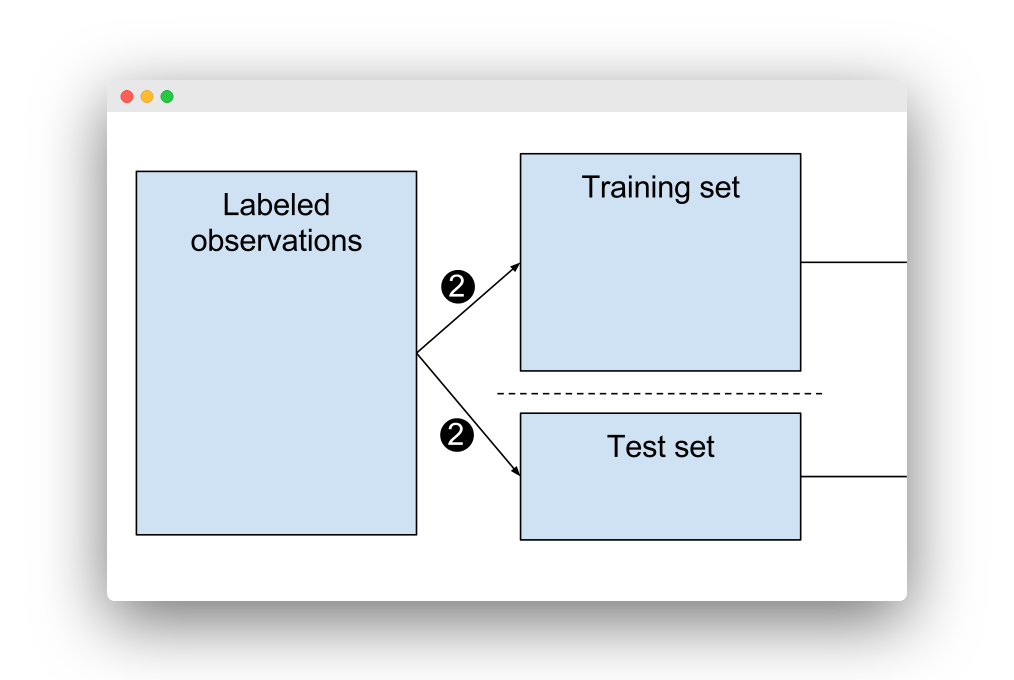

<h3> Accuracy and saving </h3>

<p> To get more info from the model about our regression I've used certain ways to inform us about the progress it has done in regard to its accuracy</p>

In [ ]:
best_accuracy = 0

#I've got high standards I know, thanks to my parents!
while best_accuracy < 0.95:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    accuracy = linear.score(x_test, y_test)

    print(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy

<p> Here's a way to save the data using pickle, dont really like it but thats what i found...: </p>

In [ ]:
import pickle
    
#To save a model with the best accuracy   

        with open ("gradeprediction.pickle", "wb" ) as f:
            pickle.dump(linear, f)'''


pickle_in = open("gradeprediction.pickle", "rb")
linear = pickle.load(pickle_in)

<h3> The outcome printing </h3>

<p> Printing out the predictions </p>

In [ ]:
predictions = linear.predict(x_test)

for x in range (len(predictions)):
    print(predictions[x], x_test[x],y_test[x])

<p> Printing out parameters of the y=ax+b function </p> 

In [ ]:
print("Coefficient:  \n", linear.coef_)
print("Intercept:  \n", linear.intercept_)

<p> Printing out the duration </p>

In [ ]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

<h3> Plotting the data </h3>


In [ ]:
#Using a t-parameter to make it easier to change
t = "G1"

style.use("seaborn-paper")
width = 9
height = 8
pyplot.figure(figsize=(width, height))
sns.regplot(x=t, y="G3", data=data)
pyplot.xlabel("First test grade (G1)")
pyplot.ylabel("Final Grade (G3)")
pyplot.ylim(0,)
pyplot.legend()

pyplot.show()

In [ ]:
# predict the G3 score using the test data
predictions = linear.predict(x_test)

# plot the predicted values against the actual values
pyplot.scatter(y_test, predictions, c='blue', label='Predicted')
pyplot.scatter(y_test, y_test, c='orange', label='Actual')
pyplot.xlabel("Actual Score")
pyplot.ylabel("Predicted Score")
pyplot.title("Actual vs. Predicted Scores")
pyplot.legend()

pyplot.show()

<h3> Graphs </h3>


<p> Those graphs present data from a model with 95% accureacy </p>

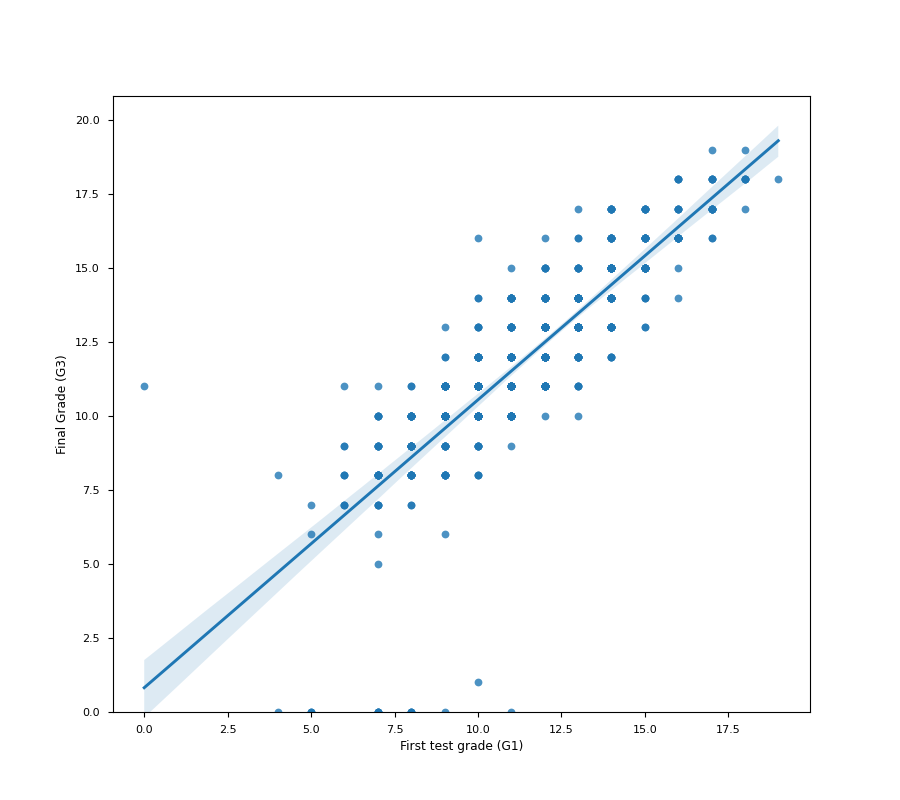


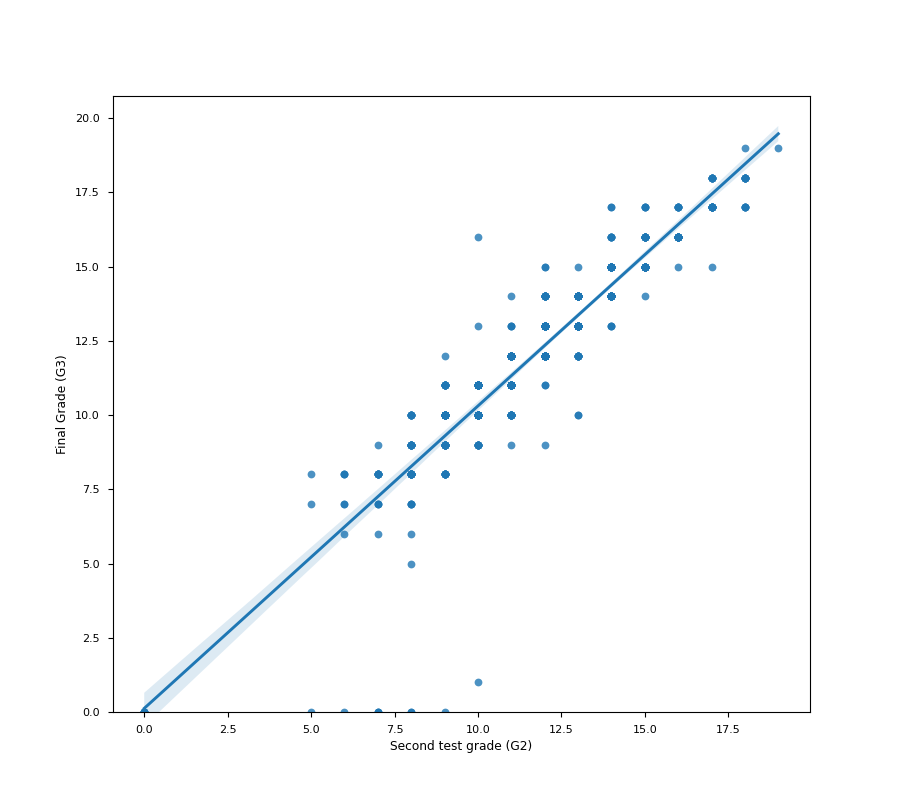

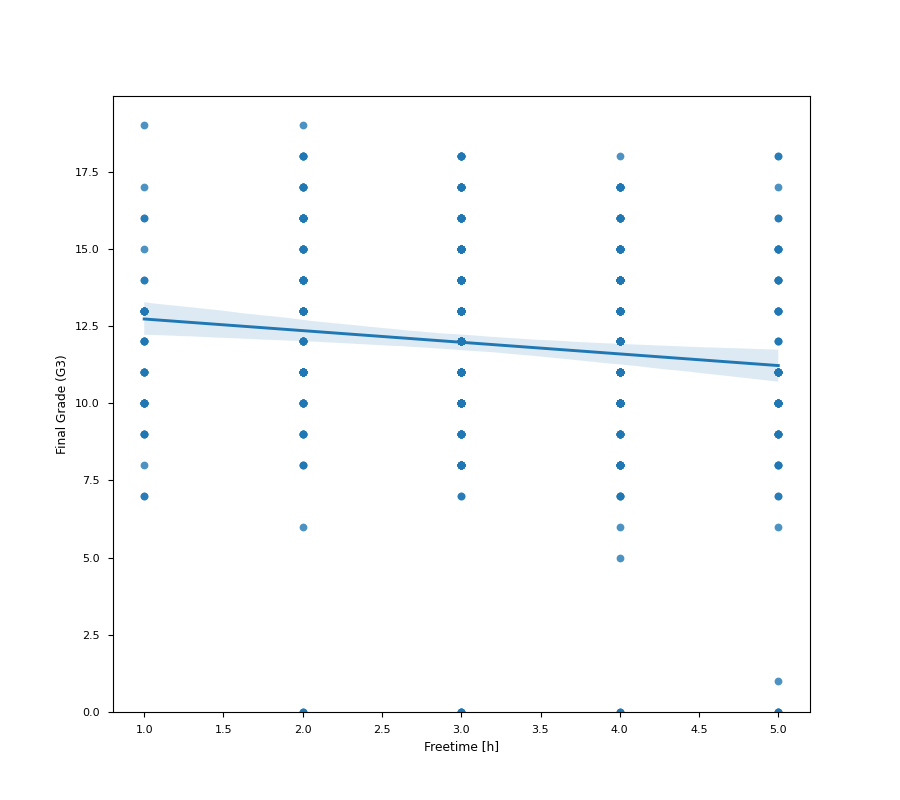

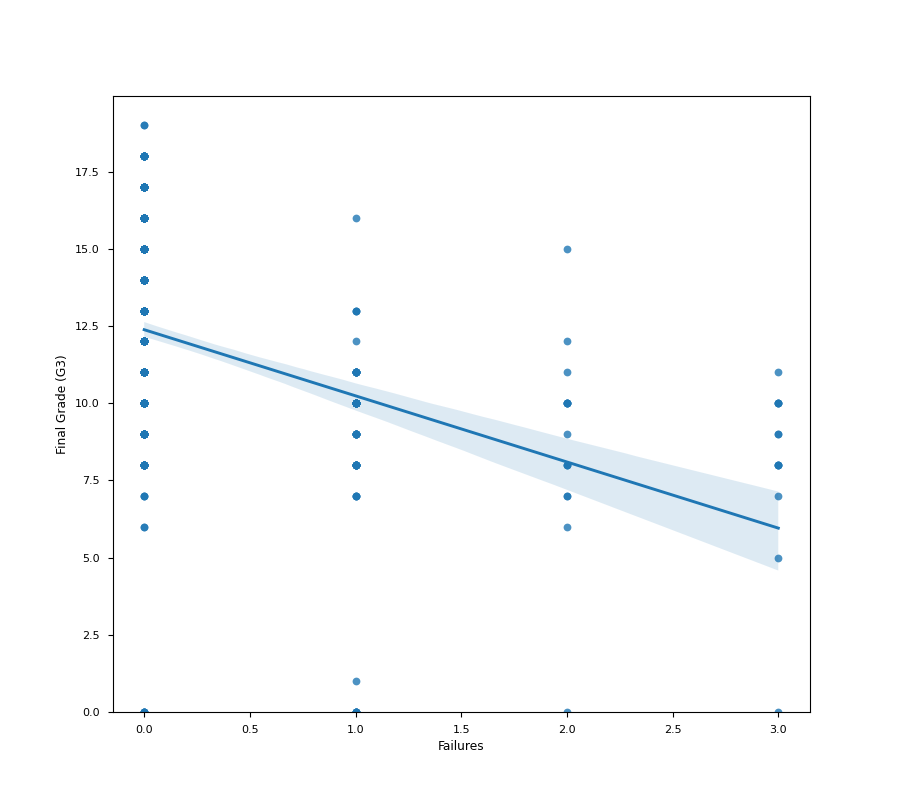

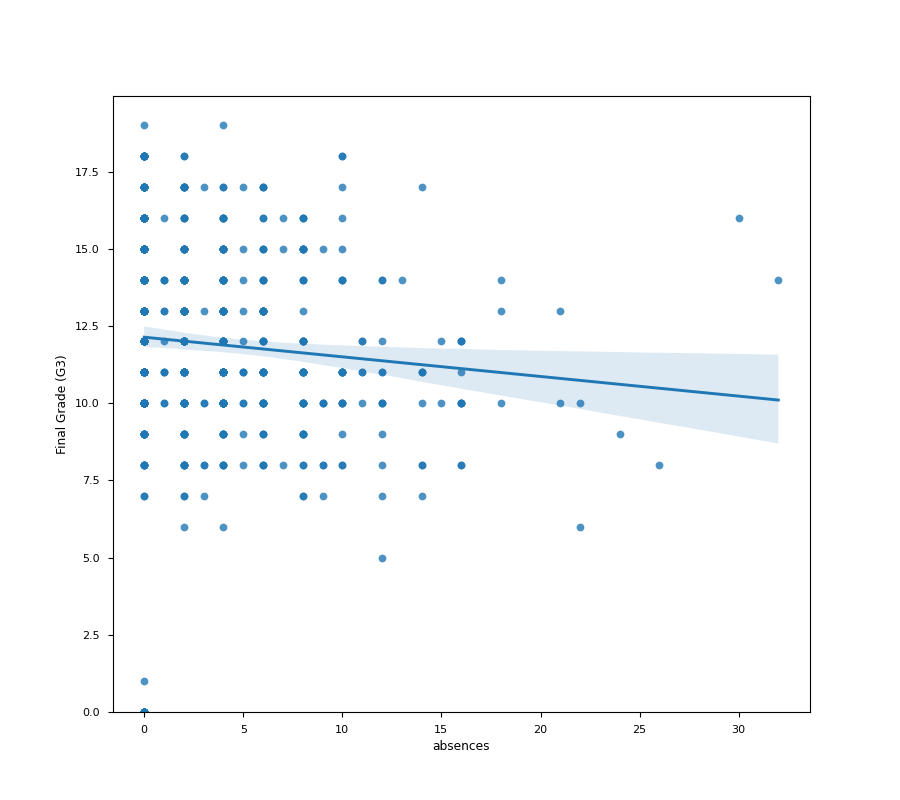

<p> Actual vs Predicted Scores </p>

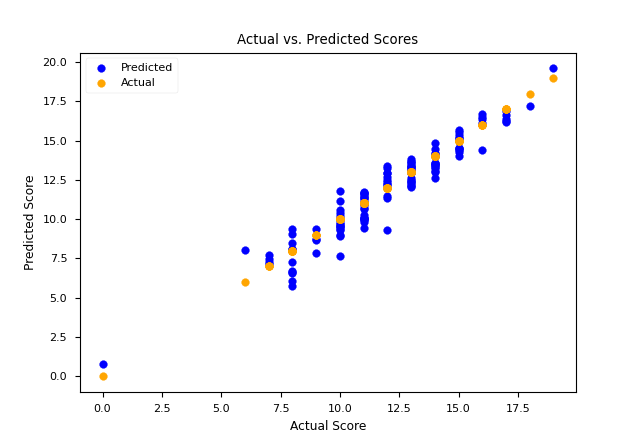

<h5> I'd say pretty slay, i mean sh!t works </h5>

<h3> The outcomes </h3>

<p> Terminal cause why not - also lets me check if those graphs are not bs! </p>


<p> Also those are for "First test grade (G1)" </p>

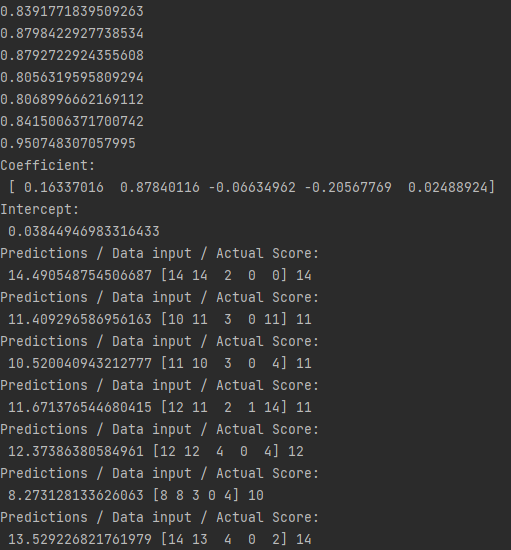 

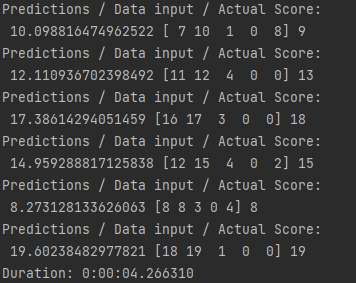